In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve, validation_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_tic_toe_data(data_path='./data/tic-tac-toe/tic-tac-toe.data'):
    return pd.read_csv(data_path)

In [3]:
tic_tac_toe_data = load_tic_toe_data()
for col_name in tic_tac_toe_data.columns:
#     print(tic_tac_toe_data[col_name].dtype)
    if(tic_tac_toe_data[col_name].dtype == 'object'):
        tic_tac_toe_data[col_name]= tic_tac_toe_data[col_name].astype('category')
        tic_tac_toe_data[col_name] = tic_tac_toe_data[col_name].cat.codes
tic_tac_toe_data.describe()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
count,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000
mean,1.221526,1.132706,1.221526,1.132706,1.311390,1.133751,1.221526,1.133751,1.222571,0.653083
std,0.775566,0.798892,0.775566,0.798892,0.741201,0.799372,0.775566,0.799372,0.775941,0.476238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [4]:
X = tic_tac_toe_data.iloc[:, np.r_[0:9]]
y = tic_tac_toe_data.iloc[:, np.r_[9:10]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [27]:
mlp_clf = MLPClassifier(solver='adam', activation='relu', max_iter=900, random_state=42)
mlp_clf.fit(X_train, y_train)

MLPClassifier(max_iter=900, random_state=42)

In [6]:
cross_val_score(mlp_clf, X_train, y_train, cv=10)

array([0.92307692, 0.78125   , 0.84375   , 0.8125    , 0.8125    ,
       0.8125    , 0.796875  , 0.78125   , 0.703125  , 0.8125    ])

In [8]:
# from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
import warnings
warnings.filterwarnings('ignore')
# C_range = 10. ** np.arange(-3, 8)
# gamma_range = 10. ** np.arange(-5, 4)
n_range = range(50, 1000, 50)

cv = StratifiedShuffleSplit(n_splits=3, test_size=0.33, random_state=42)
param_grid = {"max_iter":n_range, "activation":['relu', 'logistic']}
# param_grid = {"activation":['relu', 'logistic']}
grid = GridSearchCV(MLPClassifier(solver='adam'), param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2)

grid.fit(X_train, y_train)

print("The best classifier is: ", grid.best_estimator_)

Fitting 3 folds for each of 38 candidates, totalling 114 fits
The best classifier is:  MLPClassifier(max_iter=900)


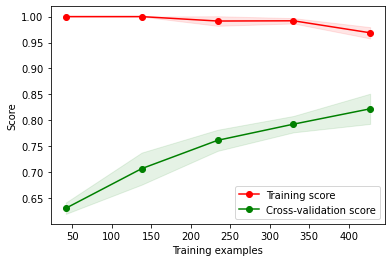

In [28]:
train_sizes, train_scores, test_scores = learning_curve(mlp_clf, X_train, y_train, cv=3, random_state=42)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

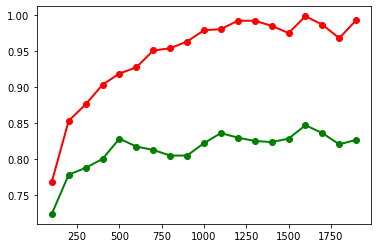

In [21]:
lw = 2
max_iter_range = range(100,2000, 100)
train_scores, test_scores = validation_curve(MLPClassifier(), X_train, y_train, param_name="max_iter", param_range=max_iter_range, scoring="accuracy", cv=3)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.plot(max_iter_range, train_scores_mean, 'o-', label="Training score", color="r", lw=lw)
plt.plot(max_iter_range, test_scores_mean, 'o-', label="Cross-validation score", color="g", lw=lw)

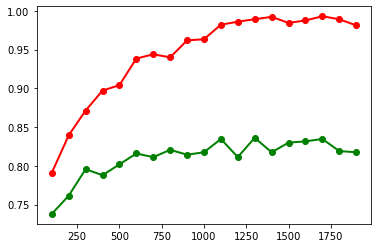

In [25]:
lw = 2
max_iter_range = range(100,2000, 100)
train_scores, test_scores = validation_curve(MLPClassifier(solver='adam', activation='relu'), X_train, y_train, param_name="max_iter", param_range=max_iter_range, scoring="accuracy", cv=3)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.plot(max_iter_range, train_scores_mean, 'o-', label="Training score", color="r", lw=lw)
plt.plot(max_iter_range, test_scores_mean, 'o-', label="Cross-validation score", color="g", lw=lw)

In [22]:
predictions = mlp_clf.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       102
           1       0.86      0.89      0.88       214

    accuracy                           0.83       316
   macro avg       0.81      0.80      0.80       316
weighted avg       0.83      0.83      0.83       316

[[ 72  30]
 [ 23 191]]


In [11]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [14]:
mnist_X, mnist_y = mnist["data"], mnist["target"].astype(np.uint8)
print(mnist_X.shape, mnist_y.shape)
mnist_X_train, mnist_X_test, mnist_y_train, mnist_y_test = train_test_split(mnist_X, mnist_y, test_size=.33, random_state=42)

(70000, 784) (70000,)


In [15]:
# from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
import warnings
warnings.filterwarnings('ignore')
# C_range = 10. ** np.arange(-3, 8)
# gamma_range = 10. ** np.arange(-5, 4)
n_range = range(200, 1000, 100)

cv = StratifiedShuffleSplit(n_splits=3, test_size=0.33, random_state=42)
param_grid = {"max_iter":n_range, "activation":['relu', 'logistic']}
# param_grid = {"activation":['relu', 'logistic']}
grid = GridSearchCV(MLPClassifier(solver='adam'), param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2)

grid.fit(mnist_X_train, mnist_y_train)

print("The best classifier is: ", grid.best_estimator_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
The best classifier is:  MLPClassifier(max_iter=800)


In [16]:
mnist_mlp_clf = MLPClassifier(solver='adam', activation='relu', max_iter=800, random_state=42)
mnist_mlp_clf.fit(mnist_X_train, mnist_y_train)

MLPClassifier(max_iter=800, random_state=42)

In [17]:
cross_val_score(mnist_mlp_clf, mnist_X_train, mnist_y_train, cv=3)

array([0.95049252, 0.95637434, 0.95707798])

C:\Users\yasse\miniconda3\envs\cs7641\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yasse\miniconda3\envs\cs7641\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yasse\miniconda3\envs\cs7641\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yasse\miniconda3\envs\cs7641\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yasse\minic

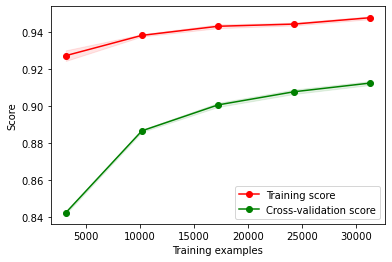

In [27]:
train_sizes, train_scores, test_scores = learning_curve(mnist_mlp_clf, mnist_X_train, mnist_y_train, cv=3, random_state=42)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

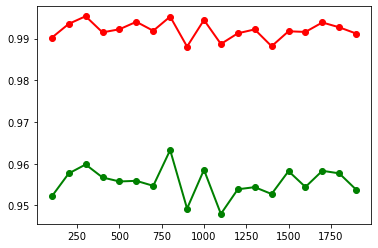

In [30]:
lw = 2
max_iter_range = range(100,2000, 100)
train_scores, test_scores = validation_curve(MLPClassifier(), mnist_X_train, mnist_y_train, param_name="max_iter", param_range=max_iter_range, scoring="accuracy", cv=3)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.plot(max_iter_range, train_scores_mean, 'o-', label="Training score", color="r", lw=lw)
plt.plot(max_iter_range, test_scores_mean, 'o-', label="Cross-validation score", color="g", lw=lw)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  57 | elapsed:  8.0min remaining:  7.8min
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed: 13.8min finished


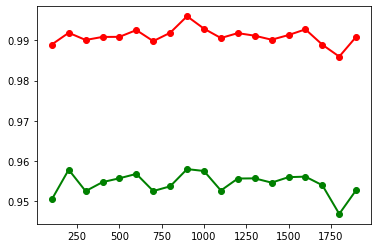

In [26]:
lw = 2
max_iter_range = range(100,2000, 100)
train_scores, test_scores = validation_curve(MLPClassifier(solver='adam', activation='relu'), mnist_X_train, mnist_y_train, param_name="max_iter", param_range=max_iter_range, scoring="accuracy", cv=3, n_jobs=-1, verbose=2)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.plot(max_iter_range, train_scores_mean, 'o-', label="Training score", color="r", lw=lw)
plt.plot(max_iter_range, test_scores_mean, 'o-', label="Cross-validation score", color="g", lw=lw)

In [24]:
predictions = mnist_mlp_clf.predict(mnist_X_test)
print(classification_report(mnist_y_test, predictions))
print(confusion_matrix(mnist_y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2267
           1       0.98      0.98      0.98      2603
           2       0.96      0.96      0.96      2350
           3       0.96      0.95      0.95      2383
           4       0.97      0.96      0.97      2144
           5       0.95      0.95      0.95      2107
           6       0.97      0.98      0.98      2294
           7       0.96      0.97      0.97      2455
           8       0.95      0.94      0.94      2196
           9       0.95      0.96      0.95      2301

    accuracy                           0.96     23100
   macro avg       0.96      0.96      0.96     23100
weighted avg       0.96      0.96      0.96     23100

[[2196    1   12    0    4    6   15    7   24    2]
 [   1 2556   12   10    1    1    1    6   14    1]
 [  10    8 2261   13    7    4    5   21   16    5]
 [   1    0   23 2267    2   36    2   18   18   16]
 [   1    4    5    2 2060   